# Importing the Dependencies

In [55]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Data Collection 

In [56]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/content/heart_disease_data.csv')

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [59]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [60]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [61]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [62]:
heart_data.duplicated().any()

True

In [63]:
heart_data=heart_data.drop_duplicates()

In [64]:
heart_data.duplicated().any()

False

In [65]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#Data Processing

In [66]:
cate_val=[]
cont_val=[]
for column in heart_data.columns:
  if heart_data[column].nunique()<=10:
    cate_val.append(column)
  else:
    cont_val.append(column)

In [67]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [68]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

#Feature Scaling

In [69]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Splitting the Dataset into Training Set and Test Set

In [72]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [73]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

# Splitting the Features and Target

In [74]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [75]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [76]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64


In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [78]:
print(X.shape, X_train.shape, X_test.shape)

(302, 13) (241, 13) (61, 13)


# Model Training

**Logistic Regression**

In [79]:
model = LogisticRegression()

In [80]:
# training the LogisticRegression model with Training data
model.fit(X_train.values, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

*Accuracy* Score

In [81]:
# accuracy on training data
X_train_prediction = model.predict(X_train.values)
ac1 = accuracy_score(X_train_prediction, Y_train)

In [82]:
print('Accuracy on Training data : ', ac1)

Accuracy on Training data :  0.8506224066390041


In [83]:
# accuracy on test data
X_test_prediction = model.predict(X_test.values)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [84]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.819672131147541


*Building a Predictive System*

In [85]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


*Accuracy* Score

*Saving the Trained Model*


In [86]:
import pickle

In [87]:
filename='trained_model.sav'
pickle.dump(model,open(filename, 'wb'))

In [88]:
#loading the saved model
loaded_model=pickle.load(open('trained_model.sav','rb'))

In [89]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


**SVC MODEL**

In [90]:
from sklearn import svm
svm=svm.SVC()


In [91]:
svm.fit(X_train.values,Y_train)

SVC()

In [92]:
y_pred2=svm.predict(X_train.values)

*Accuracy* Score

In [93]:
accuracy_score(Y_train,y_pred2)

0.6721991701244814

In [94]:
y_pred2=svm.predict(X_test.values)

In [95]:
ac2=accuracy_score(Y_test,y_pred2)

In [96]:
ac2

0.6229508196721312

**K NEAREST NEIGHBOUR CLASSIFIER**

In [97]:
from sklearn.neighbors import KNeighborsClassifier
Knn_model= KNeighborsClassifier()
Knn_model.fit(X_train.values,Y_train)
y_pred3=Knn_model.predict(X_train.values)
accuracy_score(Y_train,y_pred3)



0.7759336099585062

In [98]:
y_pred3=Knn_model.predict(X_test.values)
ac3=accuracy_score(Y_test,y_pred3)

In [99]:
score=[]
for k in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train.values,Y_train)
  y_pred=knn.predict(X_test.values)
  score.append(accuracy_score(Y_test,y_pred))

In [100]:
score

[0.5573770491803278,
 0.5245901639344263,
 0.6229508196721312,
 0.5901639344262295,
 0.639344262295082,
 0.639344262295082,
 0.6229508196721312,
 0.6065573770491803,
 0.639344262295082,
 0.6065573770491803,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6065573770491803,
 0.6229508196721312,
 0.6229508196721312,
 0.639344262295082,
 0.639344262295082,
 0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6557377049180327,
 0.6885245901639344,
 0.6885245901639344,
 0.6721311475409836,
 0.6065573770491803,
 0.6721311475409836,
 0.639344262295082,
 0.6229508196721312,
 0.6557377049180327,
 0.6065573770491803,
 0.639344262295082,
 0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6557377049180327,
 0.639344262295082,
 0.6557377049180327,
 0.6065573770491803]

**DECISION TREE**

In [101]:
from sklearn.tree import DecisionTreeClassifier

DT_model= DecisionTreeClassifier()
DT_model.fit(X_train.values, Y_train)

y_pred4a=DT_model.predict(X_train.values)
training_data_accuracy=accuracy_score(y_pred4a,Y_train)


y_pred4b=DT_model.predict(X_test.values)
ac4= accuracy_score(y_pred4b,Y_test)

In [102]:
ac4

0.7704918032786885

**RANDOM FOREST**

In [103]:
from sklearn.ensemble import RandomForestClassifier

RF_model= RandomForestClassifier()
RF_model.fit(X_train.values, Y_train)

Y_pred5a= RF_model.predict(X_train.values)
training_data_accuracy=accuracy_score(Y_train,Y_pred5a)

Y_pred5b= RF_model.predict(X_test.values)
ac5= accuracy_score(Y_test,Y_pred5b)

In [104]:
ac5

0.7868852459016393

In [105]:
final_data=pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF'],'Accuracy':[ac1,ac2,ac3,ac4,ac5]})

# Comparing the Algorithms

In [106]:
final_data

,Models,Accuracy
0,LR,0.850622
1,SVM,0.622951
2,KNN,0.639344
3,DT,0.770492
4,RF,0.786885


<Axes: xlabel='Models', ylabel='Accuracy'>

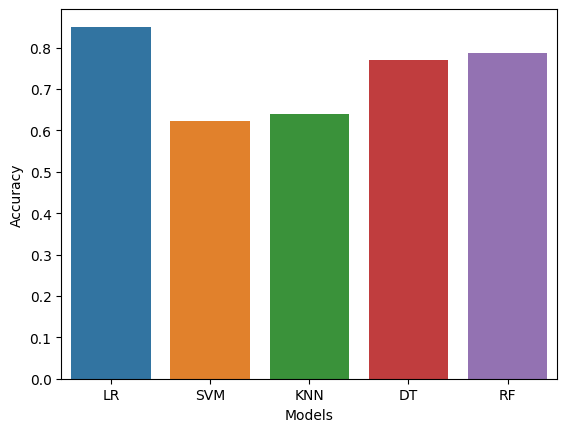

In [107]:
import seaborn as sns
sns.barplot(x='Models',y='Accuracy',data=final_data)